In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
import sys
sys.path.append("../human_3d_pose_baseline/")
from utils import camera_utils, data_utils, vis_utils

## Load Human3.6M camera parameters

In [3]:
cams = camera_utils.load_cameras("../dataset/h36m/cameras.h5")

## Load Human3.6M 3d poses

In [4]:
actions = ["Sitting",]  # actions to load.
camera_frame = False  # whether transform 3d poses into the camera frame from the original world frame or not.

train_set, test_set, data_mean, data_std, dim_to_ignore, dim_to_use, train_root_positions, test_root_positions = \
    data_utils.read_3d_data(actions, "../dataset/h36m/", cams, camera_frame=camera_frame, predict_14=False)

In [5]:
train_set

{(1,
  'Sitting',
  'Sitting 1.h5'): array([[-0.04467541, -0.85151713,  0.20741998, ..., -0.15090777,
         -0.14984435, -0.94343514],
        [-0.04697797, -0.83760562,  0.21784643, ..., -0.19492098,
         -0.08145451, -0.98522693],
        [-0.04920342, -0.82721392,  0.21596948, ..., -0.24358793,
         -0.00638867, -1.02458465],
        ...,
        [ 0.11116181, -1.37522818,  0.44217934, ...,  0.35248767,
         -0.21254123, -0.31766016],
        [ 0.11511766, -1.37958726,  0.47266568, ...,  0.3837098 ,
         -0.21527164, -0.28132391],
        [ 0.11779442, -1.38535078,  0.48185335, ...,  0.40635311,
         -0.21798923, -0.24971305]]),
 (1,
  'Sitting',
  'Sitting 2.h5'): array([[-0.09044989, -0.43156891,  0.52043872, ..., -0.88416183,
          0.48567704, -1.07513702],
        [-0.09195869, -0.41712087,  0.52212797, ..., -0.84682861,
          0.47896406, -1.08274477],
        [-0.09281077, -0.41056129,  0.52083288, ..., -0.80379937,
          0.47226244, -1.090908

## Extract a seqence from the training sequences

In [6]:
seq_idx = 0
pose_seq = list(train_set.values())[seq_idx]

pose_seq.shape

(3304, 48)

## Un-normalize poses

In [7]:
pose_seq = data_utils.unnormalize_data(pose_seq, data_mean, data_std, dim_to_ignore)

pose_seq.shape

(3304, 96)

## Plot a 3d pose in the sequence!

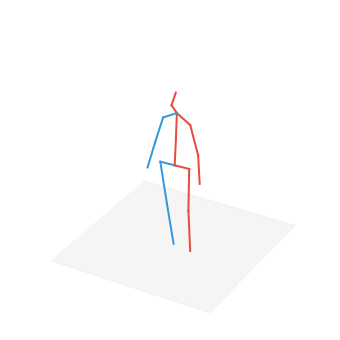

In [8]:
frame_idx = 10

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
vis_utils.show_3d_pose(pose_seq[frame_idx], ax)

## Plot 3d pose sequence!

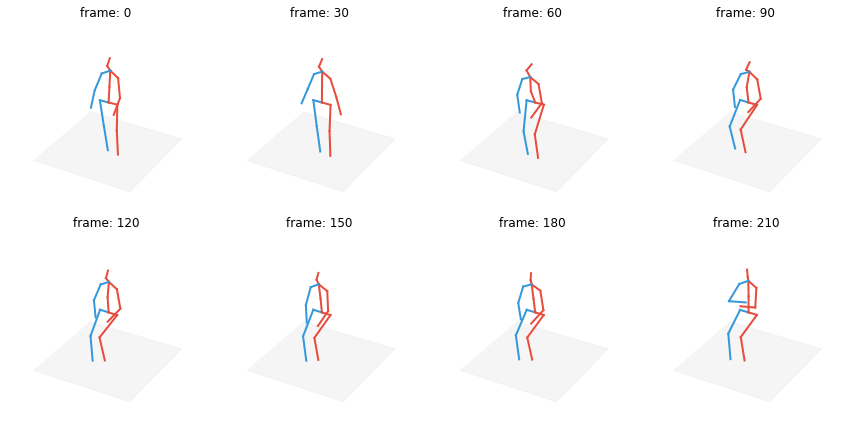

In [9]:
def plot(fig, subplot_xmax, subplot_ymax, subplot_idx, pose, frame_idx=None):
    ax = fig.add_subplot(
        f"{subplot_ymax}{subplot_xmax}{subplot_idx}",
        projection='3d'
    )
    vis_utils.show_3d_pose(pose, ax)
    if frame_idx is not None:
        ax.set_title(f"frame: {frame_idx}")
    

fig = plt.figure(figsize=(12, 6))

subplot_xmax, subplot_ymax = 4, 2
frame_increment = 30

subplot_idx = 0
for x in range(subplot_xmax):
    for y in range(subplot_ymax):
        frame_idx = subplot_idx * frame_increment
        plot(
            fig,
            subplot_xmax,
            subplot_ymax,
            subplot_idx + 1,
            pose_seq[frame_idx],
            frame_idx
        )
        subplot_idx += 1

fig.tight_layout()